In [10]:
from sklearn.svm import SVC
from RSMVFS_GPU import RSMVFS
from data_loader import get_data
import cupy as np
import time

In [11]:
DATA = "MF"
reg_value = {"ad": (10 ** -2, 10 ** -3, 10**-50), "MF": (10 ** -2, 10 ** -2, 10**-3),
             "sample": (10 ** -2, 10 ** -2, 10**-50)}

In [12]:
X, y = get_data(DATA)

n = y.shape[0]
c = y.shape[1]
v = len(X)

l1, l2, eps_0 = reg_value[DATA]
W = [(10 ** -3) * np.eye(x.shape[1], y.shape[1]) for x in X]
Z = np.zeros((n, c))
U = np.zeros((n, c))
F = np.zeros((n, n))

In [13]:
model = RSMVFS(X, y, Z, U, F, W, l1=l1, l2=l2, verbose=True, eps_0=eps_0)
start = time.time()
W, a = model.run()
print(time.time() - start)
print(a)

[Iter   1] Error:  1.49802, Z:  16.8627, U =  0.0
[Iter   2] Error:  0.0283771, Z:  16.9739, U =  1.42828e-15
[Iter   3] Error:  0.0207084, Z:  17.0758, U =  1.45041e-15
[Iter   4] Error:  0.0177162, Z:  17.1692, U =  1.01054e-15
[Iter   5] Error:  0.015587, Z:  17.2547, U =  9.54945e-16
[Iter   6] Error:  0.0141254, Z:  17.333, U =  1.96982e-15
[Iter   7] Error:  0.012971, Z:  17.4045, U =  9.79606e-16
[Iter   8] Error:  0.0119538, Z:  17.47, U =  1.95383e-15
[Iter   9] Error:  0.0110189, Z:  17.5298, U =  1.39382e-15
[Iter  10] Error:  0.0101498, Z:  17.5844, U =  1.91773e-15
[Iter  11] Error:  0.00933866, Z:  17.6343, U =  1.53086e-15
[Iter  12] Error:  0.00858178, Z:  17.6798, U =  1.13046e-15
[Iter  13] Error:  0.00787781, Z:  17.7213, U =  1.14512e-15
[Iter  14] Error:  0.00722389, Z:  17.7592, U =  1.99701e-15
[Iter  15] Error:  0.00661781, Z:  17.7937, U =  1.02523e-15
[Iter  16] Error:  0.00605737, Z:  17.8252, U =  1.70121e-15
[Iter  17] Error:  0.00554021, Z:  17.8539, U =  

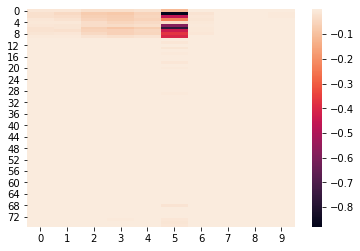

<Figure size 432x288 with 0 Axes>

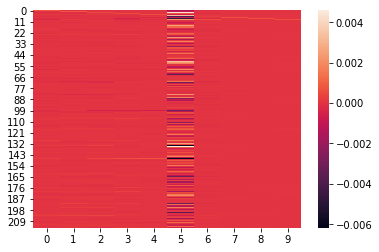

<Figure size 432x288 with 0 Axes>

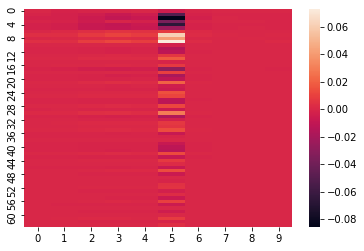

<Figure size 432x288 with 0 Axes>

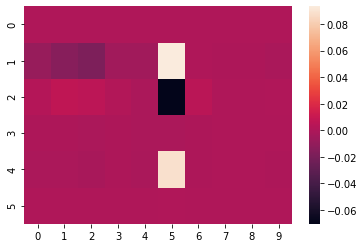

<Figure size 432x288 with 0 Axes>

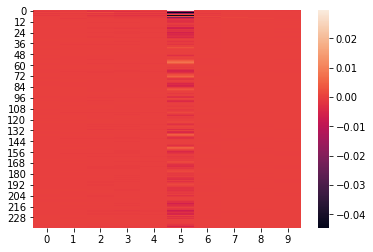

<Figure size 432x288 with 0 Axes>

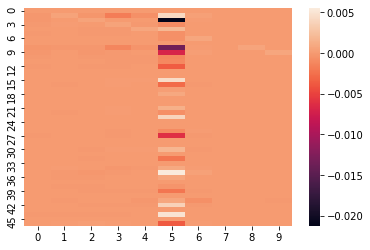

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
import os
import seaborn as sns

for i, w in enumerate(W):
    fig = plt.figure()
    ax = sns.heatmap(w.get())
    plt.figure(tight_layout=True)

#     fig.savefig(path + f"W_{i}.jpg")

In [73]:
norm_of_features = np.linalg.norm(np.concatenate(W), axis=1)
print(norm_of_features.shape)

(649,)


In [29]:
X_concat = np.concatenate(X, axis=1)
X_concat.shape

(2000, 649)

In [75]:
top_100 = np.argpartition(norm_of_features, -100)[-100:]
top_100 = np.sort(top_100)
selected = X_concat[:, top_100]

In [76]:
top_100

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  13,  15,
        18,  20,  68,  73,  74,  75, 210, 223, 292, 293, 294, 295, 296,
       297, 298, 299, 300, 301, 303, 304, 305, 306, 308, 309, 310, 311,
       312, 313, 315, 316, 317, 318, 319, 320, 321, 322, 323, 325, 326,
       327, 328, 331, 332, 333, 334, 335, 336, 338, 339, 340, 344, 347,
       348, 349, 353, 357, 358, 360, 362, 363, 364, 365, 367, 369, 370,
       371, 380, 382, 386, 418, 419, 428, 434, 435, 444, 445, 575, 582,
       584, 586, 587, 604, 610, 611, 629, 637, 646], dtype=int64)

## Data split

In [109]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [77]:
train_ratio, test_ratio = 0.8, 0.2
n = 2000
np.random.seed(3)

In [78]:
train_idx = np.random.choice(n,  int(n*0.8))
train_idx = np.sort(train_idx)
print(train_idx.shape)
train_idx

(1600,)


array([   1,    3,    3, ..., 1997, 1999, 1999], dtype=int64)

In [100]:
def train_test_split(X, y, train_idx):
    y = np.repeat(np.array(range(10)), 200)
    X_train = X[train_idx, :].get()
    y_train = y[train_idx].get()
    X_test = X[~train_idx, :].get()
    y_test = y[~train_idx].get()
    return X_train, X_test, y_train, y_test

In [101]:
X_org_tr, X_org_ts, y_org_tr, y_org_ts = train_test_split(X_concat, y, train_idx)

In [102]:
X_org_tr[0][:50]

array([0.04914215, 0.17597068, 0.10551464, 0.22709455, 0.59927961,
       0.04121696, 0.43107763, 0.09680073, 0.32673867, 0.05966093,
       0.01718438, 0.31469027, 0.01290434, 0.4531075 , 0.20936369,
       0.0533312 , 0.08133398, 0.00754989, 0.2348765 , 0.04348951,
       0.01963094, 0.16112937, 0.04432878, 0.13267879, 0.13041485,
       0.07386554, 0.05119187, 0.03022129, 0.14486721, 0.02389516,
       0.01678971, 0.12118056, 0.07688914, 0.0548958 , 0.08867811,
       0.09720924, 0.01954784, 0.02690619, 0.11328339, 0.02042287,
       0.02492869, 0.08536438, 0.09084388, 0.01198566, 0.09217746,
       0.07263301, 0.00689356, 0.04041279, 0.00737273, 0.03024146])

In [103]:
X_fs_tr, X_fs_ts, y_fs_tr, y_fs_ts = train_test_split(selected, y, train_idx)

In [104]:
X_fs_tr[0][:50]

array([ 4.91421500e-02,  1.75970680e-01,  1.05514640e-01,  2.27094550e-01,
        5.99279610e-01,  4.12169600e-02,  4.31077630e-01,  9.68007300e-02,
        3.26738670e-01,  5.96609300e-02,  3.14690270e-01,  4.53107500e-01,
        5.33312000e-02,  2.34876500e-01,  1.96309400e-02,  4.53862200e-02,
        4.45277110e-01,  8.39780100e-02,  3.54091930e-01,  6.48000000e+02,
        6.28000000e+02, -5.03600883e+00, -1.28853331e+01,  1.61155220e-01,
        5.92459800e-01,  3.12353373e+00,  4.22046947e+00, -6.41177082e+00,
       -6.33532810e+00, -2.44621750e-01,  1.34607291e+00, -1.42550921e+00,
        3.54610562e+00, -2.72800231e+00,  1.45671130e-01,  1.07079887e+00,
        1.67683434e+00,  3.45810533e+00,  2.14182425e+00, -8.93003000e-03,
       -1.89980483e+00,  3.86368270e-01,  3.25236080e-01, -8.57550800e-01,
        2.59981155e+00,  6.46874670e-01, -8.84928700e-01, -7.89922480e-01,
       -1.01107252e+00,  1.08524919e+00])

## SVM without feature selection

In [105]:
clf = SVC(C=2, random_state=3, kernel="rbf")

In [107]:
%timeit
clf.fit(X_org_tr, y_org_tr)

SVC(C=2, random_state=3)

In [108]:
y_pred = clf.predict(X_org_ts)

In [110]:
org_accuracy = accuracy_score(y_org_ts, y_pred)
org_f1 = f1_score(y_org_ts, y_pred, average='weighted')

In [111]:
print('Accuracy (Original): ', "%.2f" % (org_accuracy*100))
print('F1 (Original): ', "%.2f" % (org_f1*100))

Accuracy (Original):  91.56
F1 (Original):  91.58


## SVM with feature selection

In [117]:
fs_clf = SVC(C=2, random_state=3, kernel="rbf")

In [118]:
%timeit
fs_clf.fit(X_fs_tr, y_fs_tr)

SVC(C=2, random_state=3)

In [119]:
y_fs_pred = fs_clf.predict(X_fs_ts)

In [120]:
fs_accuracy = accuracy_score(y_fs_ts, y_fs_pred)
fs_f1 = f1_score(y_fs_ts, y_fs_pred, average='weighted')

In [121]:
print('Accuracy (Original): ', "%.2f" % (fs_accuracy*100))
print('F1 (Original): ', "%.2f" % (fs_f1*100))

Accuracy (Original):  69.75
F1 (Original):  69.38
